In [206]:
import os
import numpy as np
from keras.models import load_model
mpath = "/home/mirabot/googledrive/deeplearning/seaiceprj/mpfdata/model/"
mname = "igarss1109.h5"
model = load_model(mpath+mname)

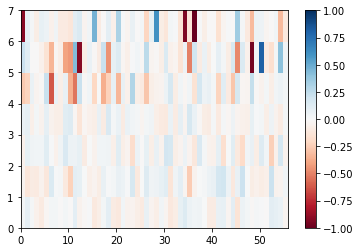

In [215]:
import matplotlib.pyplot as plt
%matplotlib inline
w = model.layers[0].get_weights()[0]
w = w/np.amax(abs(w))
w_min, w_max = -np.abs(w).max(), np.abs(w).max()
plt.pcolor(w,cmap='RdBu',vmin=w_min, vmax=w_max)
plt.colorbar()

In [214]:
"""calculate input relative importance"""
w1 = model.layers[0].get_weights()[0]
w2 = model.layers[3].get_weights()[0]
w3 = model.layers[6].get_weights()[0]
w4 = model.layers[9].get_weights()[0]

mvp = abs(w1).dot(abs(w2)).dot(abs(w3)).dot(abs(w4))
#print(mvp)
mvpr = mvp.sum(axis=1)
print(mvpr)

for r in mvpr:
    print(r/mvpr.sum()*100)

[  9361.98535156  18486.80664062  15097.22070312  12607.02148438
  33356.265625    45694.7421875   24878.76757812]
5.8702159673
11.5917235613
9.46636199951
7.90494084358
20.9152728319
28.6518275738
15.5996546149


In [209]:
"""Analyze weights
Qi Liu
"""

from __future__ import print_function

import h5py

def print_structure(weight_file_path):
    """
    Prints out the structure of HDF5 file.

    Args:
      weight_file_path (str) : Path to the file to analyze
    """
    f = h5py.File(weight_file_path)
    try:
        if len(f.attrs.items()):
            print("{} contains: ".format(weight_file_path))
            print("Root attributes:")
        for key, value in f.attrs.items():
            print("  {}: {}".format(key, value))

        if len(f.items())==0:
            return

        for layer, g in f.items():
            print("  {}".format(layer))
            print("    Attributes:")
            for key, value in g.attrs.items():
                print("      {}: {}".format(key, value))

            print("    Dataset:")
            for p_name in g.keys():
                param = g[p_name]
                print("      {}: {}".format(p_name, param.shape))
    finally:
        f.close()

if __name__ == '__main__':
    weight_file_path = "/home/mirabot/googledrive/deeplearning/seaiceprj/mpfdata/model/weights.h5"
    print_structure(weight_file_path)


/home/mirabot/googledrive/deeplearning/seaiceprj/mpfdata/model/weights.h5 contains: 
Root attributes:
  layer_names: ['dense_21' 'activation_17' 'dropout_13' 'dense_22' 'activation_18'
 'dropout_14' 'dense_23' 'activation_19' 'dropout_15' 'dense_24'
 'activation_20' 'dense_25']
  activation_17
    Attributes:
      weight_names: []
    Dataset:
  activation_18
    Attributes:
      weight_names: []
    Dataset:
  activation_19
    Attributes:
      weight_names: []
    Dataset:
  activation_20
    Attributes:
      weight_names: []
    Dataset:
  dense_21
    Attributes:
      weight_names: ['dense_21_W' 'dense_21_b']
    Dataset:
      dense_21_W: (7, 56)
      dense_21_b: (56,)
  dense_22
    Attributes:
      weight_names: ['dense_22_W' 'dense_22_b']
    Dataset:
      dense_22_W: (56, 28)
      dense_22_b: (28,)
  dense_23
    Attributes:
      weight_names: ['dense_23_W' 'dense_23_b']
    Dataset:
      dense_23_W: (28, 28)
      dense_23_b: (28,)
  dense_24
    Attributes:
      

In [68]:
A=np.random.rand(3,3)
X=np.random.rand(3,1)
Y = A.dot(X)

In [79]:
from numpy.linalg import inv
#B = Y*X.reshape(1,3)*inv(X*X.reshape(1,3))


In [78]:
X=np.random.rand(3,1)
np.linalg.matrix_rank(K)

1

In [77]:
K = X*X.reshape(1,3)
K

array([[ 0.62371225,  0.46959427,  0.24663253],
       [ 0.46959427,  0.35355853,  0.18569016],
       [ 0.24663253,  0.18569016,  0.09752511]])